<a href="https://colab.research.google.com/github/SravaniPrakki/TravelRecommendation_ML/blob/main/GCN_Trip_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yelp review dataset**

In [ ]:
import pandas as pd
path="/content/yelp_training_set_review.csv"

df=pd.read_csv(path)

In [ ]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0  business_blank  \
0                0           False   
1                1           False   
2                2           False   
3                3           False   
4                4           False   
...            ...             ...   
229902      229902           False   
229903      229903           False   
229904      229904           False   
229905      229905           False   
229906      229906           False   

                                      business_categories business_city  \
0                         Breakfast & Brunch; Restaurants       Phoenix   
1                             Italian; Pizza; Restaurants       Phoenix   
2                             Middle Eastern; Restaurants         Tempe   
3                           Active Life; Dog Parks; Parks    Scottsdale   
4                                       Tires; Automotive          Mesa   
...                                                   ...  

In [ ]:
print(df.head(5))

   Unnamed: 0  business_blank              business_categories business_city  \
0           0           False  Breakfast & Brunch; Restaurants       Phoenix   
1           1           False      Italian; Pizza; Restaurants       Phoenix   
2           2           False      Middle Eastern; Restaurants         Tempe   
3           3           False    Active Life; Dog Parks; Parks    Scottsdale   
4           4           False                Tires; Automotive          Mesa   

                     business_full_address             business_id  \
0        6106 S 32nd St\nPhoenix, AZ 85042  9yKzy9PApeiPPOUJEtnvkg   
1  4848 E Chandler Blvd\nPhoenix, AZ 85044  ZRJwVLyzEJq1VAihDhYiow   
2     1513 E  Apache Blvd\nTempe, AZ 85281  6oRAC4uyJCsJl1X0WZpVSA   
3   5401 N Hayden Rd\nScottsdale, AZ 85250  _1QQZuf4zZOyFCvXc0o6Vg   
4        1357 S Power Road\nMesa, AZ 85206  6ozycU1RpktNG2-1BroVtw   

   business_latitude  business_longitude       business_name  \
0          33.390792         -112.

In [ ]:
print("Players: ", df.shape[0])
df.head()

Players:  229907


,Unnamed: 0,business_blank,business_categories,business_city,business_full_address,business_id,business_latitude,business_longitude,business_name,business_neighborhoods,...,reviewer_funny,reviewer_name,reviewer_review_count,reviewer_type,reviewer_useful,stars,text,type,useful,user_id
0,0,False,Breakfast & Brunch; Restaurants,Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",9yKzy9PApeiPPOUJEtnvkg,33.390792,-112.012504,Morning Glory Cafe,NaN,...,331,Jason,376,user,1034,5,My wife took me here on my birthday for breakf...,review,5,rLtl8ZkDX5vH5nAx9C3q5Q
1,1,False,Italian; Pizza; Restaurants,Phoenix,"4848 E Chandler Blvd\nPhoenix, AZ 85044",ZRJwVLyzEJq1VAihDhYiow,33.305607,-111.978758,Spinato's Pizzeria,NaN,...,2,Paul,2,user,0,5,I have no idea why some people give bad review...,review,0,0a2KyEL0d3Yb1V6aivbIuQ
2,2,False,Middle Eastern; Restaurants,Tempe,"1513 E Apache Blvd\nTempe, AZ 85281",6oRAC4uyJCsJl1X0WZpVSA,33.414345,-111.913031,Haji-Baba,NaN,...,0,Nicole,3,user,3,4,love the gyro plate. Rice is so good and I als...,review,1,0hT2KtfLiobPvh6cDC8JQg
3,3,False,Active Life; Dog Parks; Parks,Scottsdale,"5401 N Hayden Rd\nScottsdale, AZ 85250",_1QQZuf4zZOyFCvXc0o6Vg,33.522945,-111.907886,Chaparral Dog Park,NaN,...,18,lindsey,31,user,75,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,uZetl9T0NcROGOyFfughhg
4,4,False,Tires; Automotive,Mesa,"1357 S Power Road\nMesa, AZ 85206",6ozycU1RpktNG2-1BroVtw,33.391027,-111.684482,Discount Tire,NaN,...,3,Roger,28,user,32,5,General Manager Scott Petello is a good egg!!!...,review,0,vYmM4KTsC8ZfQBg-j5MWkw


In [ ]:
max(df["business_id"].value_counts())
# it means the table is heterogenous ?

844

In [ ]:
x = df.to_numpy()
x.shape # [num_movie_nodes x movie_node_feature_dim]

(229907, 32)

# **Kaggle dataset - indonesia reviews**

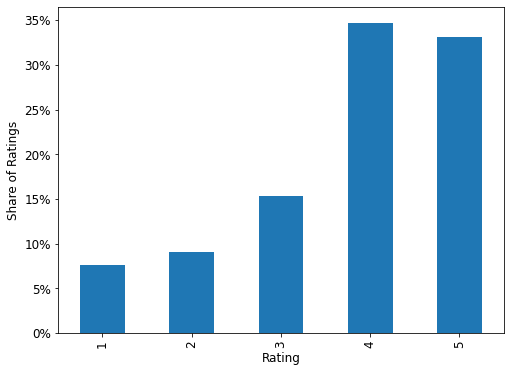

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure()
ax = df.stars.value_counts(True).sort_index().plot.bar(figsize=(8,6))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Share of Ratings', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.savefig('Ratings_distribution.png')

what kind of table it has to be heterogenous need to extract the user, edges, node features to represent it in a graph format.

In [ ]:
path="/content/sample_data/package_tourism.csv"

In [ ]:
ff=pd.read_csv(path)

In [ ]:
#ff.describe

#fifa_ff = ff.sort_values(by="useful", ascending=False)
# print("Players: ", df_user.shape[0])
# df_user

In [ ]:
df_ratings = pd.read_csv('/content/sample_data/tourism_rating.csv')
df_movies = pd.read_csv('/content/sample_data/tourism_with_id.csv')

merged1 = pd.merge(df_ratings, df_movies, on='Place_Id', how='left')
df_user=pd.read_csv('/content/sample_data/user.csv')
merged2=pd.merge(merged1, df_user, on='User_Id', how='left')

In [ ]:
merged2.describe

<bound method NDFrame.describe of       User_Id  Place_Id  Place_Ratings                         Place_Name  \
0           1       179              3                    Candi Ratu Boko   
1           1       344              2                      Pantai Marina   
2           1         5              5           Atlantis Water Adventure   
3           1       373              3             Museum Kereta Ambarawa   
4           1       101              4      Kampung Wisata Sosro Menduran   
...       ...       ...            ...                                ...   
9995      300       425              2        Waterpark Kenjeran Surabaya   
9996      300        64              4     Museum Sasmita Loka Ahmad Yani   
9997      300       311              3                 The Lodge Maribaya   
9998      300       279              4  Masjid Agung Trans Studio Bandung   
9999      300       163              2                Watu Mabur Mangunan   

                                         

In [ ]:
fifa_df = merged2.sort_values(by="Rating", ascending=False)
print("Players: ", fifa_df.shape[0])
fifa_df.Place_Ratings

Players:  10000


6139    2
6168    2
9457    4
9420    5
9736    2
       ..
2379    1
6872    3
2326    4
8421    4
2466    3
Name: Place_Ratings, Length: 10000, dtype: int64

In [ ]:
print("Players: ", fifa_df.shape[0])
fifa_df.head()

Players:  10000


,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12,Location,Age
6139,184,29,2,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Pusat Perbelanjaan,Jakarta,0,5.0,NaN,"{'lat': -6.166788700000001, 'lng': 106.8265261}",-6.166789,106.826526,NaN,29,"Serang, Banten",30
6168,185,124,2,Kauman Pakualaman Yogyakarta,Pakualaman adalah sebuah kecamatan di Kota Yog...,Budaya,Yogyakarta,0,5.0,NaN,"{'lat': -7.801034700000001, 'lng': 110.3751922}",-7.801035,110.375192,NaN,124,"Cilacap, Jawa Tengah",33
9457,285,69,4,Freedom Library,Freedom Library adalah perpustakaan buku yang ...,Budaya,Jakarta,0,5.0,NaN,"{'lat': -6.202248200000001, 'lng': 106.8451968}",-6.202248,106.845197,NaN,69,"Jakarta Pusat, DKI Jakarta",29
9420,283,29,5,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Pusat Perbelanjaan,Jakarta,0,5.0,NaN,"{'lat': -6.166788700000001, 'lng': 106.8265261}",-6.166789,106.826526,NaN,29,"Bogor, Jawa Barat",37
9736,293,95,2,Desa Wisata Sungai Code Jogja Kota,"Kampung Code berada di Kelurahan Kotabaru, Kec...",Taman Hiburan,Yogyakarta,0,5.0,NaN,"{'lat': -7.822908900000001, 'lng': 110.3756894}",-7.822909,110.375689,NaN,95,"Subang, Jawa Barat",34


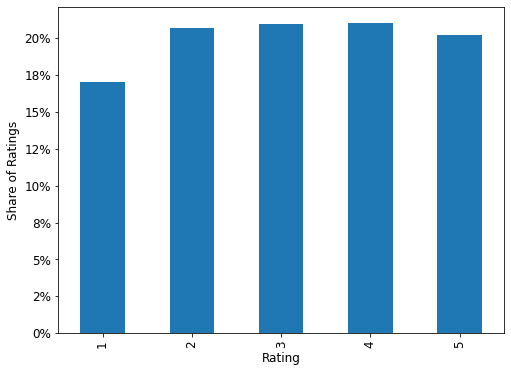

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure()
ax = fifa_df.Place_Ratings.value_counts(True).sort_index().plot.bar(figsize=(8,6))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Share of Ratings', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.savefig('Ratings_distribution.png')

** need to check if the rating is 1 to 5 similar to the movies dataset in indonesia dataset as well as in the yelp reviews stars field dataset

# **To implement Graph structure importing necessary packages**

In [2]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

1.12.1+cu113


In [4]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

     |████████████████████████████████| 7.9 MB 27.8 MB/s 
     |████████████████████████████████| 3.5 MB 32.2 MB/s 


In [5]:
!pip install -U -q PyDrive
!pip install -q git+https://github.com/snap-stanford/deepsnap.git

# **import required modules**

In [6]:
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
import torch
from torch import nn, optim, Tensor

In [8]:
import torch_geometric

In [9]:
from torch_sparse import SparseTensor, matmul

In [10]:
from torch_geometric.utils import structured_negative_sampling
from torch_geometric.data import download_url, extract_zip
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.typing import Adj

# **Load the dataset**

We have two tables - one that contains information about the users (yelp_user.csv) and another one (yelp_review.csv) that describes how the users rated the business/trips.

In [11]:
path1= 'https://data.world/brianray/yelp-reviews/workspace/file?filename=yelp_training_set_review.csv'
path2= 'https://www.kaggle.com/code/jagangupta/what-s-in-a-review-yelp-ratings-eda/data?select=yelp_user.csv'

In [13]:
# download the Yelp dataset .csv file
# This will download the CSV file from the provided URL and store it in the DataFrame df.

import pandas as pd

review_path = pd.read_csv(path1)



In [ ]:
url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
extract_zip(download_url(url, '.'), '.')

user_path = './ml-latest-small/ratings.csv'

# **Preprocess the dataset**

In [ ]:
# stuck at how to process the dataformat df to get the rating matrix....yet to be explored.

# check the graph extraction video deepfindr you have

# If that does not work try and see what fields are there in the yelp reviews pytorch geometric dataset which is already done for you...worst case consider this.

#**Train/validation/test split**

#**Mount the google drive**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Change present working directory**

In [20]:
%cd /content/drive/MyDrive/GCN_TripRecommendation/

/content/drive/MyDrive/GCN_TripRecommendation


In [21]:
pwd

'/content/drive/MyDrive/GCN_TripRecommendation'

In [22]:
!git init

Initialized empty Git repository in /content/drive/MyDrive/GCN_TripRecommendation/.git/


In [24]:
!git config --global user.email 'sprakki@horizon.csueastbay.edu'
!git config --global user.name 'SravaniPrakki'

In [25]:
!git add .
!git commit -m 'First commit'

On branch master

Initial commit

nothing to commit


In [27]:
!ls

yelp_training_set_review.csv
